# Objective:To implement the techniques learnt as a part of the course.

# Learning Outcomes:

> 1. Basic understanding of text pre-processing.
> 2. What to do after text pre-processing: 
     > >  * Bag of words
     > >  * Tf-idf
     
> 3. Build the classification model.
> 4. Evaluate the Model

## Import the libraries, load dataset, print shape of data, data description

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import sys
import os

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Setting the environment to display all the rows"
pd.set_option('display.max_rows', None)

# Setting the environment to display all the columns"
pd.set_option('display.max_columns', None)

pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

In [5]:
df_tweet = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/AIML_DataFiles/Tweets.csv')

In [6]:
df_tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [8]:
df_tweet[df_tweet['airline_sentiment_gold'] != np.nan].groupby('airline_sentiment_gold')['tweet_id'].count()

airline_sentiment_gold
negative    32
neutral      3
positive     5
Name: tweet_id, dtype: int64

In [9]:
df_tweet.groupby('negativereason')['tweet_id'].count()

negativereason
Bad Flight                      580
Can't Tell                     1190
Cancelled Flight                847
Customer Service Issue         2910
Damaged Luggage                  74
Flight Attendant Complaints     481
Flight Booking Problems         529
Late Flight                    1665
Lost Luggage                    724
longlines                       178
Name: tweet_id, dtype: int64

In [10]:
df_tweet.groupby('airline')['tweet_id'].count()

airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: tweet_id, dtype: int64

In [11]:
df_tweet.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [12]:
df_tweet.shape[0]

14640

## Understand of data-columns

1. Drop all other columns except “text”and “airline_sentiment”
2. Check the shape of data
3. Print first 5 rows of data

In [13]:
df_tweet_upd = df_tweet.loc[:,['airline_sentiment','text']]

In [14]:
df_tweet_upd.shape

(14640, 2)

In [15]:
df_tweet_upd.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [16]:
df_tweet_upd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [17]:
df_tweet_upd.groupby('airline_sentiment').count()

,text
airline_sentiment,
negative,9178
neutral,3099
positive,2363


In [18]:
## Neutral and positive sentiment are undersampled and it can be improved by upscaling the data

## Pre Processing

Text pre-processing

1. Html tag removal
2. Tokenization
3. Remove the numbers
4. Removal of Special Characters and Punctuations.
5. Conversion to lowercase.
6. Lemmatize or stemming
7. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)
8. Print first 5 rows of data after pre-processing.

### Import libraries for pre processing

In [19]:
#!pip install contractions

# Import 
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('movie_reviews')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


### Html tag removal

In [20]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

df_tweet_upd['text'] = df_tweet_upd['text'].apply(lambda x: strip_html(x))
df_tweet_upd.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [21]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

df_tweet_upd['text'] = df_tweet_upd['text'].apply(lambda x: replace_contractions(x))
df_tweet_upd.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


### Remove the numbers

In [22]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

df_tweet_upd['text'] = df_tweet_upd['text'].apply(lambda x: remove_numbers(x))
df_tweet_upd.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


### Removal of Special Characters and Punctuations

In [23]:
def remove_special_char(text):
  text = re.sub('[^A-Za-z ]+', '', text)
  return text

df_tweet_upd['text'] = df_tweet_upd['text'].apply(lambda x: remove_special_char(x))
df_tweet_upd.head()

,airline_sentiment,text
0,neutral,VirginAmerica What dhepburn said
1,positive,VirginAmerica plus you have added commercials to the experience tacky
2,neutral,VirginAmerica I did not today Must mean I need to take another trip
3,negative,VirginAmerica it is really aggressive to blast obnoxious entertainment in your guests faces they have little recourse
4,negative,VirginAmerica and it is a really big bad thing about it


### Conversion to lowercase

In [24]:
df_tweet_upd['text'] = df_tweet_upd['text'].apply(lambda x: x.lower())
df_tweet_upd.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn said
1,positive,virginamerica plus you have added commercials to the experience tacky
2,neutral,virginamerica i did not today must mean i need to take another trip
3,negative,virginamerica it is really aggressive to blast obnoxious entertainment in your guests faces they have little recourse
4,negative,virginamerica and it is a really big bad thing about it


### Tokenization

In [25]:
df_tweet_upd['Text'] = df_tweet_upd.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [26]:
df_tweet_upd.head()

,airline_sentiment,text,Text
0,neutral,virginamerica what dhepburn said,"[virginamerica, what, dhepburn, said]"
1,positive,virginamerica plus you have added commercials to the experience tacky,"[virginamerica, plus, you, have, added, commercials, to, the, experience, tacky]"
2,neutral,virginamerica i did not today must mean i need to take another trip,"[virginamerica, i, did, not, today, must, mean, i, need, to, take, another, trip]"
3,negative,virginamerica it is really aggressive to blast obnoxious entertainment in your guests faces they have little recourse,"[virginamerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]"
4,negative,virginamerica and it is a really big bad thing about it,"[virginamerica, and, it, is, a, really, big, bad, thing, about, it]"


In [27]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))     

### Lemmatize or stemming

Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)

Print first 5 rows of data after pre-processing

In [28]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

df_tweet_upd['Text'] = df_tweet_upd.apply(lambda row: normalize(row['Text']), axis=1)
df_tweet_upd.head()

,airline_sentiment,text,Text
0,neutral,virginamerica what dhepburn said,virginamerica dhepburn say
1,positive,virginamerica plus you have added commercials to the experience tacky,virginamerica plus add commercials experience tacky
2,neutral,virginamerica i did not today must mean i need to take another trip,virginamerica not today must mean need take another trip
3,negative,virginamerica it is really aggressive to blast obnoxious entertainment in your guests faces they have little recourse,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica and it is a really big bad thing about it,virginamerica really big bad thing


## Vectorization : Using CountVectorizer

In [29]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(df_tweet_upd['Text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [30]:
data_features.shape

(14640, 1000)

In [31]:
vectorizer.get_feature_names()[:20]

['aa',
 'able',
 'absolute',
 'absolutely',
 'accept',
 'acceptable',
 'access',
 'accommodate',
 'account',
 'act',
 'actual',
 'actually',
 'add',
 'address',
 'advise',
 'advisory',
 'afternoon',
 'agent',
 'agents',
 'ago']

In [32]:
df_tweet_upd.head()

,airline_sentiment,text,Text
0,neutral,virginamerica what dhepburn said,virginamerica dhepburn say
1,positive,virginamerica plus you have added commercials to the experience tacky,virginamerica plus add commercials experience tacky
2,neutral,virginamerica i did not today must mean i need to take another trip,virginamerica not today must mean need take another trip
3,negative,virginamerica it is really aggressive to blast obnoxious entertainment in your guests faces they have little recourse,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica and it is a really big bad thing about it,virginamerica really big bad thing


In [33]:
df_tweet_upd.drop(['text'],axis=1,inplace=True)

In [34]:
df_tweet_upd.groupby('airline_sentiment').count()

,Text
airline_sentiment,
negative,9178
neutral,3099
positive,2363


In [35]:
df_tweet_upd['airline_sentiment'] = df_tweet_upd['airline_sentiment'].replace(['negative','neutral','positive'],[-1,0,1])

In [36]:
df_tweet_upd.head()

,airline_sentiment,Text
0,0,virginamerica dhepburn say
1,1,virginamerica plus add commercials experience tacky
2,0,virginamerica not today must mean need take another trip
3,-1,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,-1,virginamerica really big bad thing


In [37]:
df_tweet_upd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  int64 
 1   Text               14640 non-null  object
dtypes: int64(1), object(1)
memory usage: 228.9+ KB


In [38]:
labels = df_tweet_upd['airline_sentiment']
labels = labels.astype('int')

### Splitting the data set in Train and Test Data Set

In [39]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

### Fit and evaluating model 

In [40]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7141393442622952


In [41]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)

In [42]:
result

array([ 1, -1, -1, ..., -1, -1, -1])

[[2508  213   93]
 [ 363  447   74]
 [ 178  126  390]]


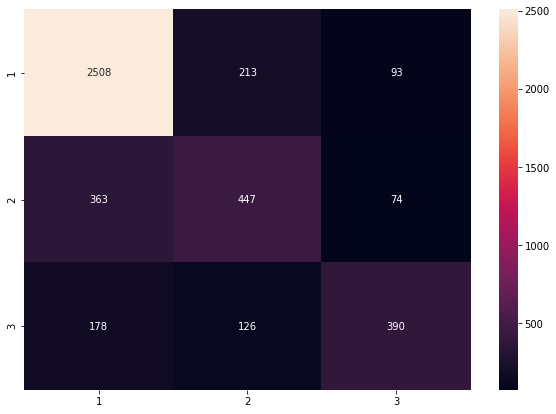

In [43]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                   columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')


## Vectorization : Using TfidfVectorizer

In [44]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(df_tweet_upd['Text'])

data_features = data_features.toarray()

data_features.shape

(14640, 1000)

In [45]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7090163934426229


In [46]:
result = forest.predict(X_test)

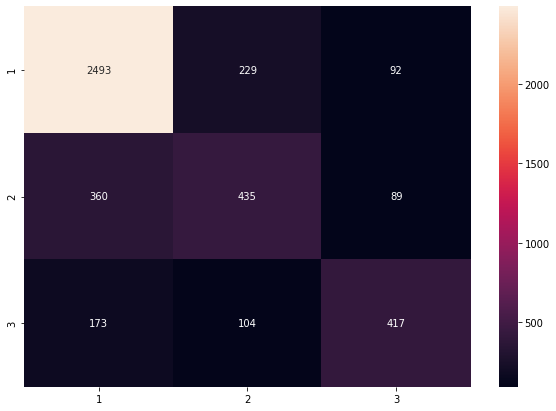

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [48]:
print(conf_mat)

[[2493  229   92]
 [ 360  435   89]
 [ 173  104  417]]


## Summary:

* We used dataset which has reviews in text format and their sentiment score on the scale of -1,0 and 1.
* The goal was to build a model for text-classification.
* We Pre-processed the data using variuos techniques and libraries.
* The pre-precessed data is converted to numbers, so that we can feed the data in the model.
* After building the classification model, we predicted the result for the test data.
* After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
* However, we can still increase the accuracy of our model by increasing the dataset using the upsampling 
* One more way to increase accuracy is to use different variations of Pre-processing techniques.